In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

### Data Understanding, Preparation and EDA ###

In [2]:
# Lets read the data frame
# lets look at the initial few records to get an understanding
pd.set_option('display.max_rows', 500)
housing = pd.read_csv("train.csv")
print (type(housing))
housing.head()

<class 'pandas.core.frame.DataFrame'>


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Lets look at some more details about the data
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# Lets get the size. It will be used in future to figure out if have missed some rows
housing.shape

(1460, 81)

In [5]:
#remove id column as it is just an index
housing.drop(columns = ["Id"], axis = 1, inplace = True)

In [6]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Lets get an idea about the data-type of the variables

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
#Identify if columns have empty/null/Nan values.

extractNull = pd.DataFrame(housing.dtypes, columns=['Dtype'])
extractNull['Null'] = housing.isnull().any()
extractNull

,Dtype,Null
MSSubClass,int64,False
MSZoning,object,False
LotFrontage,float64,True
LotArea,int64,False
Street,object,False
Alley,object,True
LotShape,object,False
LandContour,object,False
Utilities,object,False
LotConfig,object,False


In [9]:
extractNull['NullCount'] = housing.isnull().sum().values
extractNull

,Dtype,Null,NullCount
MSSubClass,int64,False,0
MSZoning,object,False,0
LotFrontage,float64,True,259
LotArea,int64,False,0
Street,object,False,0
Alley,object,True,1369
LotShape,object,False,0
LandContour,object,False,0
Utilities,object,False,0
LotConfig,object,False,0


### Let's Analyse the features which has more number of null values ###
PoolQC has more number of NULL values (1453) , but based on the data description document, the significance of values in PoolQC is :
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
This means if the value is not present in the rows , that means the data is not available. Let us add NA on all the missing rows.

Next let us analyze the feature MiscFeature. Description below:
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
We can fill NA for all the missing values.

Next let us analyze the feature Fence. Description below:	
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
We can fill NA for all the missing values.

Next let us analyze the feature Alley. Description below:
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
We can fill NA for all the missing values.

Next let us analyze the feature BsmtQual. Description below:
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
       
We can fill NA for all the missing values.

Next let us analyze the feature BsmtCond. Description below:
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
       
We can fill NA for all the missing values.

Next let us analyze the feature BsmtExposure. Description below:
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
       
We can fill NA for all the missing values.

Next let us analyze the feature BsmtFinType1. Description below:
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
We can fill NA for all the missing values.

Next let us analyze the feature BsmtFinType2. Description below:
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
We can fill NA for all the missing values.

Next let us analyze the feature FireplaceQu. Description below:
FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
We can fill NA for all the missing values.

Next let us analyze the feature GarageType. Description below:
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
       
We can fill NA for all the missing values.

Next let us analyze the feature GarageFinish. Description below:
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
       
We can fill NA for all the missing values.

Next let us analyze the feature GarageQual. Description below:
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
We can fill NA for all the missing values.

Next let us analyze the feature GarageCond. Description below:
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
       
We can fill NA for all the missing values.

Next let us analyze the feature MasVnrType. Description below:
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
       
We can fill 'None' for all the missing values.


In [10]:
columns_to_be_filled = ['GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','Alley','Fence','MiscFeature','PoolQC']
# Fill 'NA' value in selected columns
housing[columns_to_be_filled] = housing[columns_to_be_filled].fillna(value="NA")
housing['MasVnrType'] = housing['MasVnrType'].fillna(value="None")

In [11]:
extractNull['Null'] = housing.isnull().any()
extractNull['NullCount'] = housing.isnull().sum().values
extractNull

,Dtype,Null,NullCount
MSSubClass,int64,False,0
MSZoning,object,False,0
LotFrontage,float64,True,259
LotArea,int64,False,0
Street,object,False,0
Alley,object,False,0
LotShape,object,False,0
LandContour,object,False,0
Utilities,object,False,0
LotConfig,object,False,0


### Let's target non object type features which has null values. ###

For MasVnrArea: Masonry veneer area in square feet: We can fill the value 0 in missing rows as the same count of missing values were seen in MasVnrType. 

For Electrical: we add 0 in missing value : 

For GarageYrBlt: lets match it with the value of YearBuilt. Considering that it would have been built together.

For LotFrontage : Lets fille the median value in place of missing values.

In [12]:
housing["MasVnrArea"] = housing["MasVnrArea"].fillna(0)
housing["Electrical"] = housing["Electrical"].fillna(0)

# Replace missing values of the 'Lot Frontage' colum with the median of the column
housing['LotFrontage'].fillna(housing['LotFrontage'].median(), inplace=True)
housing['GarageYrBlt'].fillna(housing['YearBuilt'], inplace=True)


In [13]:
extractNull['Null'] = housing.isnull().any()
extractNull['NullCount'] = housing.isnull().sum().values
extractNull['Unique'] = housing.nunique().values
extractNull

,Dtype,Null,NullCount,Unique
MSSubClass,int64,False,0,15
MSZoning,object,False,0,5
LotFrontage,float64,False,0,110
LotArea,int64,False,0,1073
Street,object,False,0,2
Alley,object,False,0,3
LotShape,object,False,0,4
LandContour,object,False,0,4
Utilities,object,False,0,2
LotConfig,object,False,0,5


In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

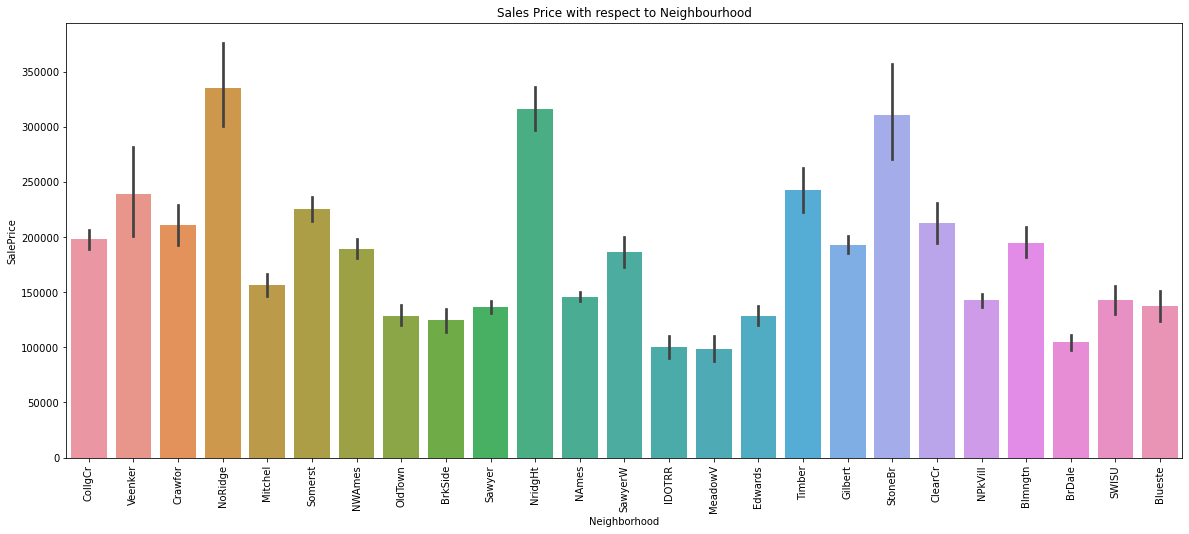

In [15]:
# Lets understand the trend between
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= housing)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

#### We See that the neighborhood affects the SalePrice as the value changes based on the neighborhood ####

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

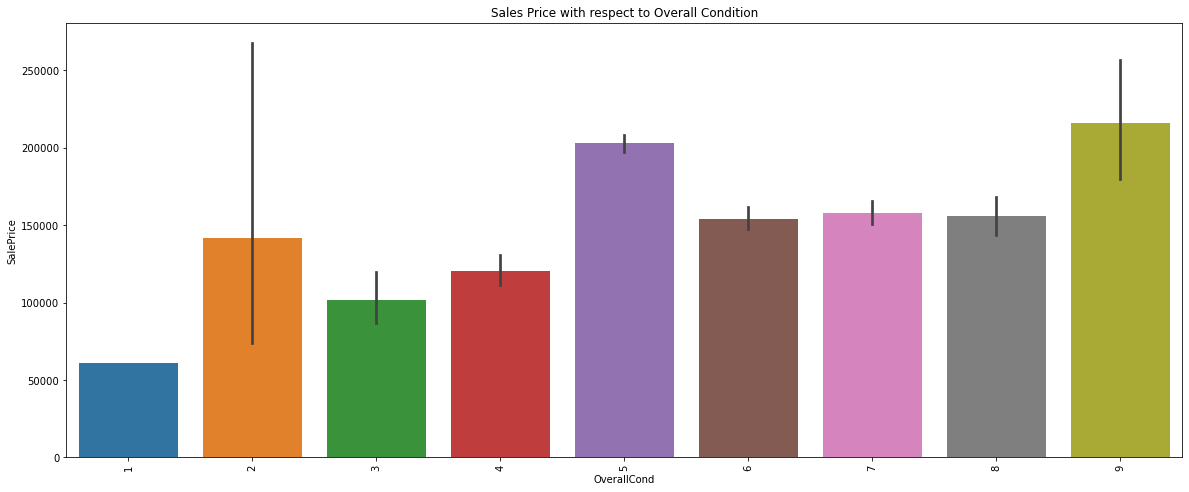

In [16]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housing)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

#### We See that the OverallCond affects the SalePrice as the value changes based on the OverallCond.  ####

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

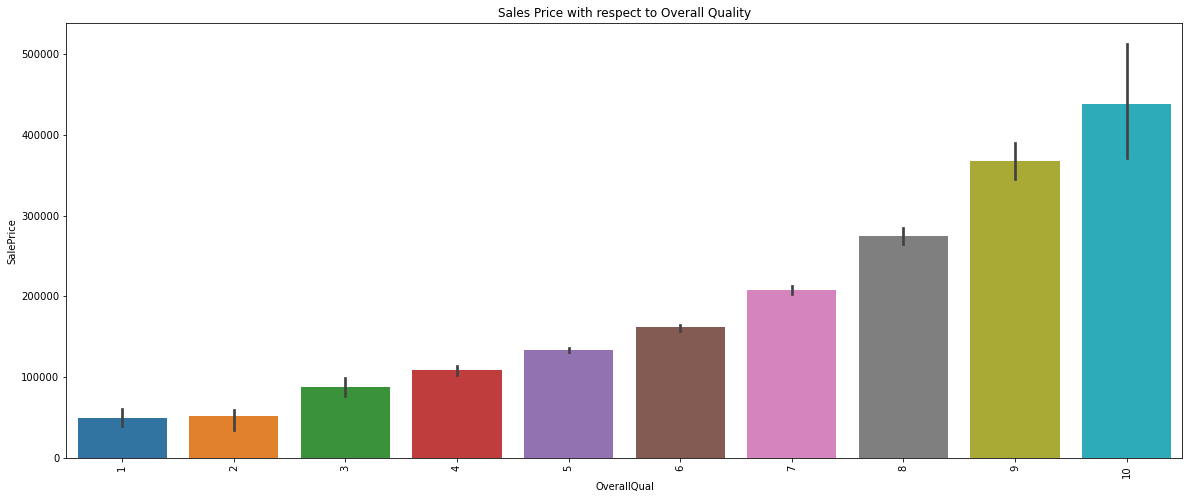

In [17]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housing)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

#### We See that the OverallQual affects the SalePrice as the value changes based on the OverallQual. ####
#### When OverallQual is high, the SalePrice increases ####

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

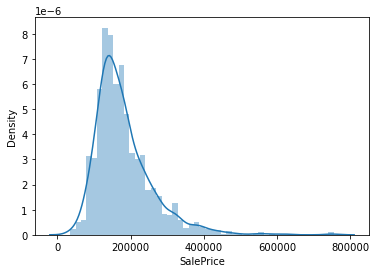

In [18]:
sns.distplot(housing['SalePrice'])

#### Skewness observed on SalePrice , so let us fix it by using Log operation.  ####

In [19]:
#Log Transformation
housing['SalePrice']=np.log1p(housing['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

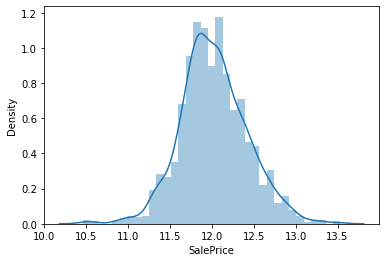

In [20]:
sns.distplot(housing['SalePrice'])

#### SalePrice is normalized now.  ####

In [21]:
# PropAge -  Property Age from yearsold - yearbuilt
housing['PropertyAge'] = (housing['YrSold'] - housing['YearBuilt'])
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,NA,NA,NA,0,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,NA,NA,NA,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,NA,NA,NA,0,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,NA,NA,NA,0,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,NA,NA,NA,0,12,2008,WD,Normal,12.429220,8


In [22]:
# We can delete MoSold, YrSold, YearBuilt, YearRemodAdd as we Total age of the property
housing = housing.drop(['MoSold'], axis = 1)
housing = housing.drop(['YrSold'], axis = 1)
housing = housing.drop(['YearBuilt'], axis = 1)
housing = housing.drop(['YearRemodAdd'], axis = 1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  RoofStyl

In [23]:
# Lets extract numerical features. And do some analysis
extract_num_feature = housing.select_dtypes(exclude = ['object'])
extract_num_feature.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,12.247699,5
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,12.109016,31
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,12.317171,7
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,11.849405,91
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,12.429220,8


In [24]:
extract_num_feature.drop(columns=extract_num_feature.columns[extract_num_feature.eq(0.0).mean()>0.9])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,SalePrice,PropertyAge
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,8,0,2003.0,2,548,0,61,0,12.247699,5
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,6,1,1976.0,2,460,298,0,0,12.109016,31
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,6,1,2001.0,2,608,0,42,0,12.317171,7
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,7,1,1998.0,3,642,0,35,272,11.849405,91
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,9,1,2000.0,3,836,192,84,0,12.429220,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,0.0,0,0,953,953,...,7,1,1999.0,2,460,0,40,0,12.072547,8
1456,20,85.0,13175,6,6,119.0,790,163,589,1542,...,7,2,1978.0,2,500,349,0,0,12.254868,32
1457,70,66.0,9042,7,9,0.0,275,0,877,1152,...,9,2,1941.0,1,252,0,60,0,12.493133,69
1458,20,68.0,9717,5,6,0.0,49,1029,0,1078,...,5,0,1950.0,1,240,366,0,112,11.864469,60


In [25]:
extract_num_feature.shape

(1460, 34)

In [26]:
extractNull2 = pd.DataFrame(extract_num_feature.dtypes, columns=['Dtype'])
extractNull2['Null'] = extract_num_feature.isnull().any()
extractNull2['NullCount'] = extract_num_feature.isnull().sum().values
extractNull2['Unique'] = extract_num_feature.nunique().values
extractNull2

,Dtype,Null,NullCount,Unique
MSSubClass,int64,False,0,15
LotFrontage,float64,False,0,110
LotArea,int64,False,0,1073
OverallQual,int64,False,0,10
OverallCond,int64,False,0,9
MasVnrArea,float64,False,0,327
BsmtFinSF1,int64,False,0,637
BsmtFinSF2,int64,False,0,144
BsmtUnfSF,int64,False,0,780
TotalBsmtSF,int64,False,0,721


array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>],
       [<AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomA

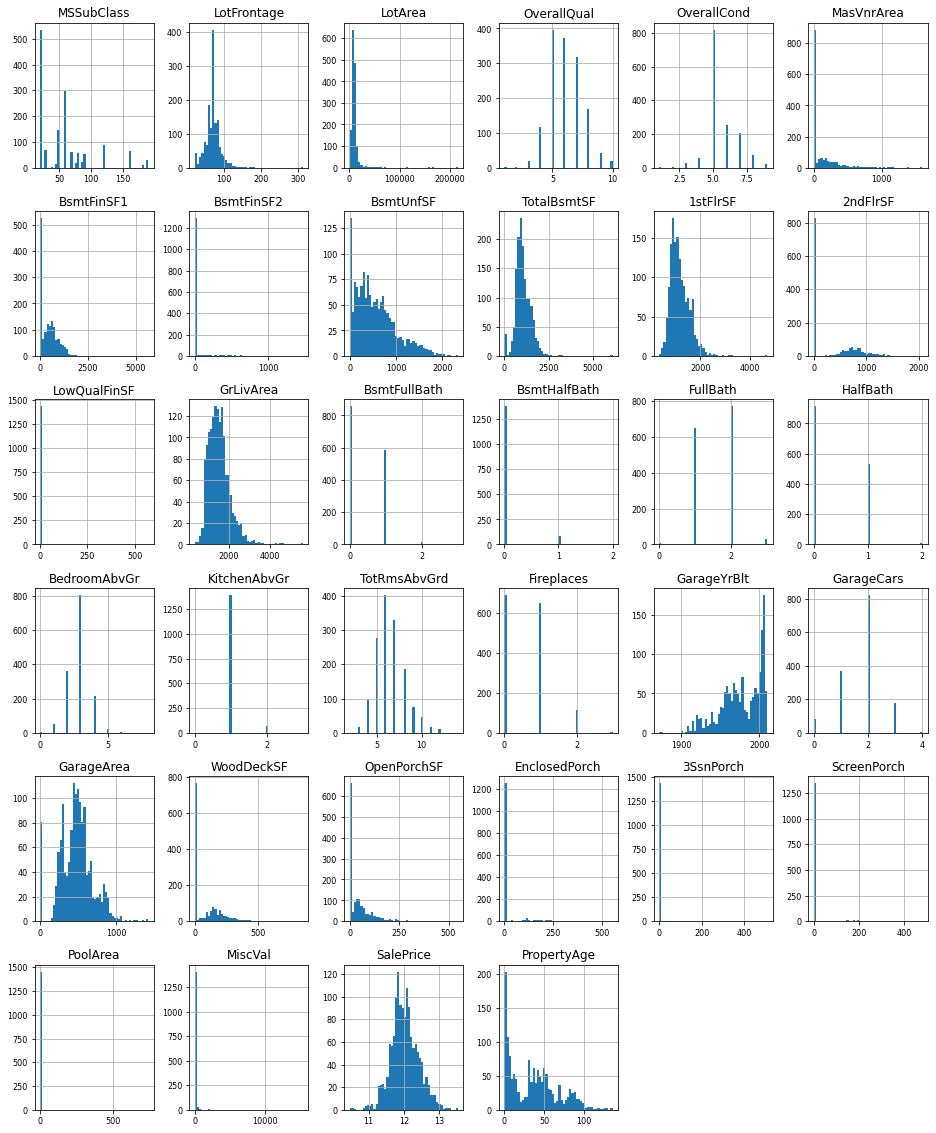

In [27]:
# Lets plot all the numerical values in histogram to understand the trend
extract_num_feature.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### Data Cleaning and Evaluation ###

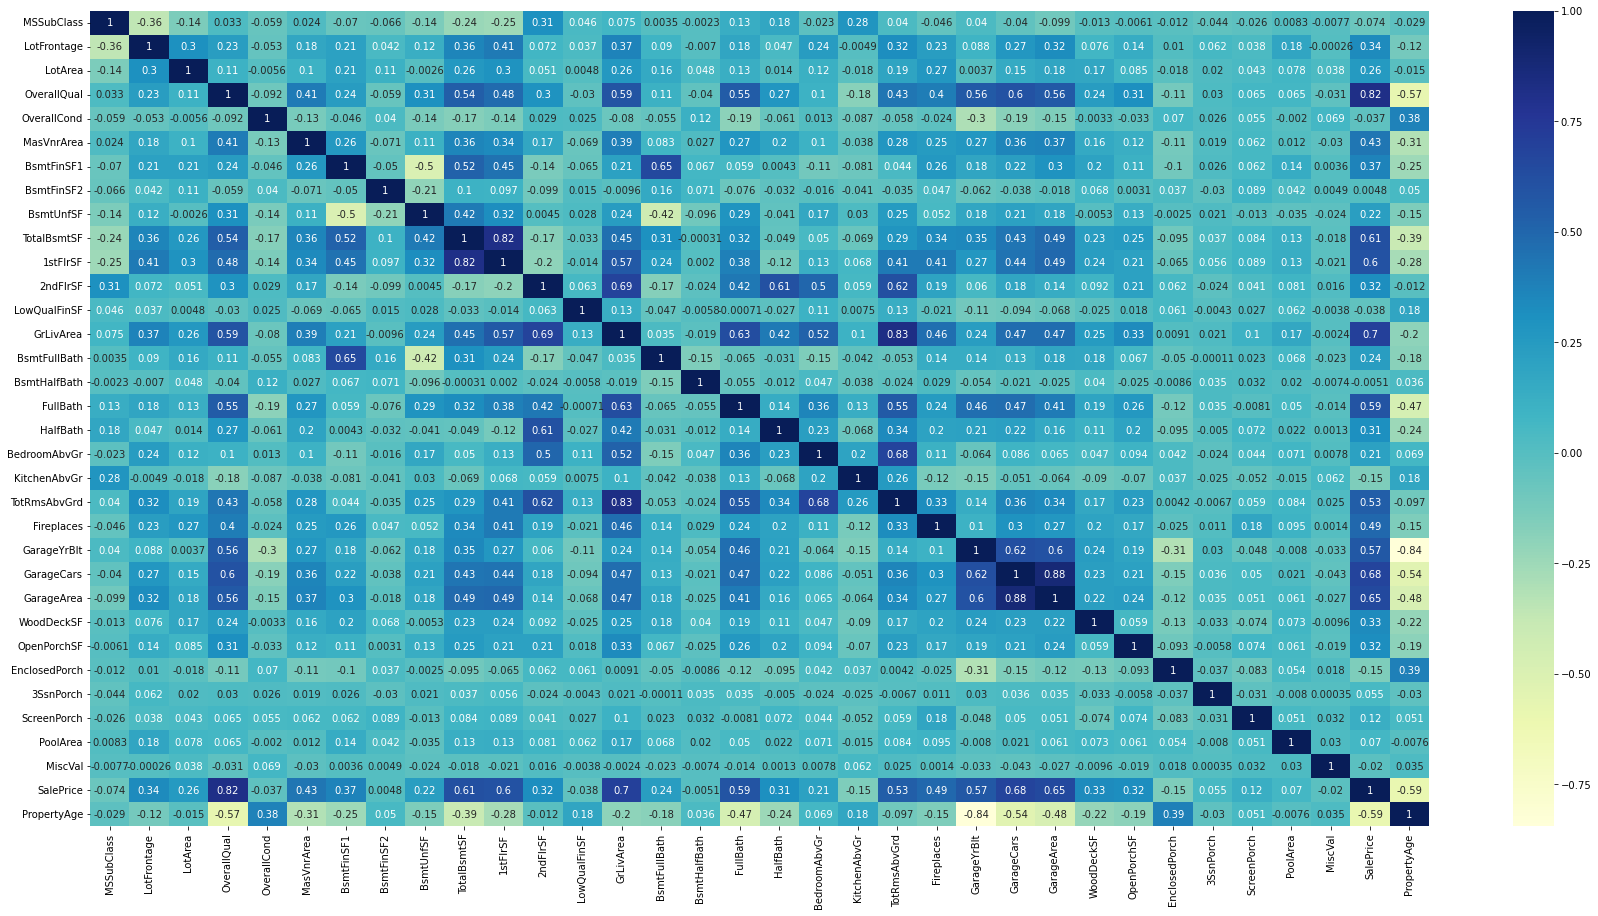

In [28]:
# We can reduce the number of variables further based on the correlation
heat_map = extract_num_feature.corr()
plt.figure(figsize=[30,15])
sns.heatmap(heat_map, cmap = 'YlGnBu', annot = True)
plt.show()

In [29]:
#Lets extract the features with high correlation. This will help us to avoid multi-colinearity
heat_map = extract_num_feature.corr()
heat_map_corr = heat_map[heat_map['SalePrice'] > 0.5]['SalePrice']
print (heat_map_corr)

OverallQual     0.817185
TotalBsmtSF     0.612134
1stFlrSF        0.596981
GrLivArea       0.700927
FullBath        0.594771
TotRmsAbvGrd    0.534422
GarageYrBlt     0.568696
GarageCars      0.680625
GarageArea      0.650888
SalePrice       1.000000
Name: SalePrice, dtype: float64


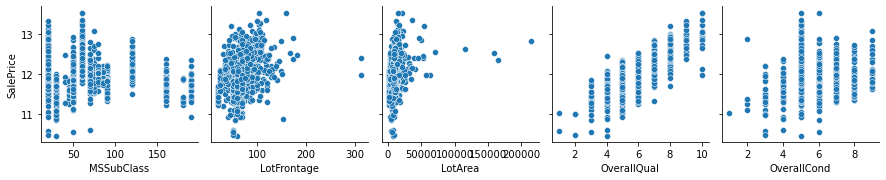

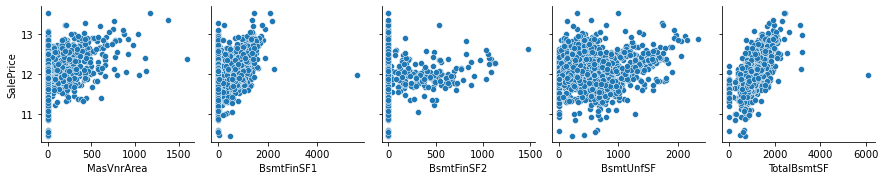

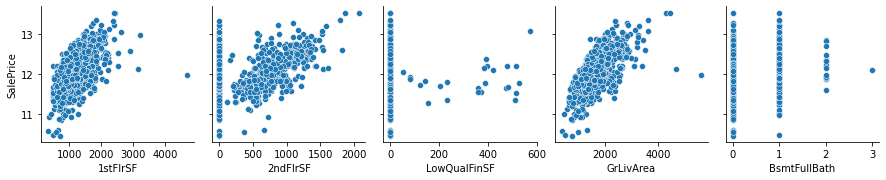

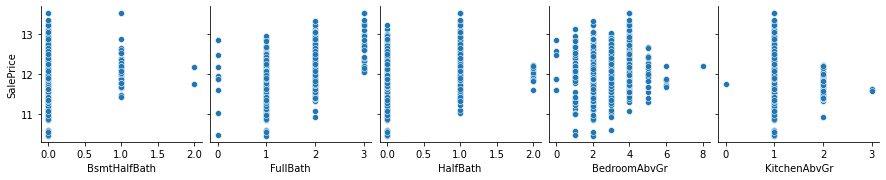

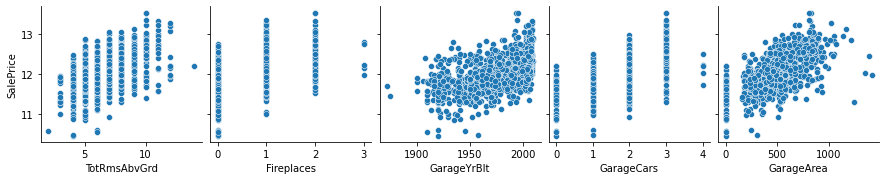

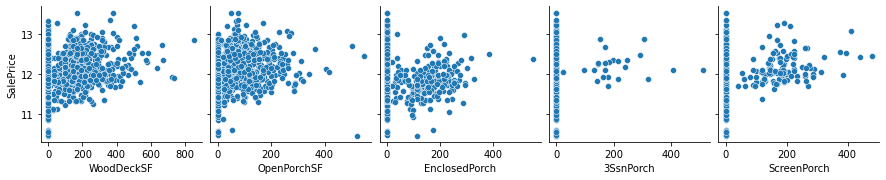

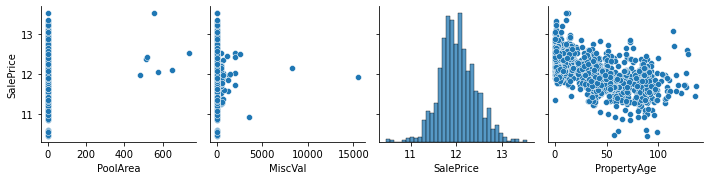

In [30]:
# Lets plot all the numerical features vs the SalePrice to understand the trend
for i in range(0, len(extract_num_feature.columns), 5):
    sns.pairplot(data=extract_num_feature,
                x_vars=extract_num_feature.columns[i:i+5],
                y_vars=['SalePrice'])

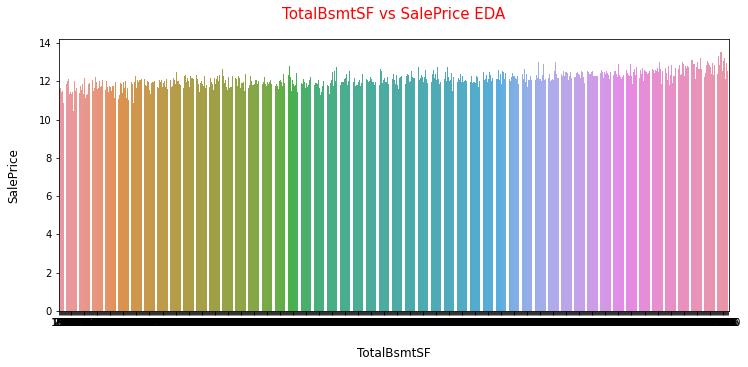

In [31]:
# Lets understad the trend between TotalBsmtSF and SalePrice
plt.figure(figsize=[12,5])
sns.barplot(x = housing["TotalBsmtSF"], y = housing["SalePrice"], ci=None)
plt.title("TotalBsmtSF vs SalePrice EDA", size = 15, color = "Red", pad = 20)
plt.xlabel("\nTotalBsmtSF", size = 12, color = "black")
plt.ylabel("SalePrice\n", size = 12, color = "black")
plt.show()

#### Positive trend observed. But significant rise is not observed. ####

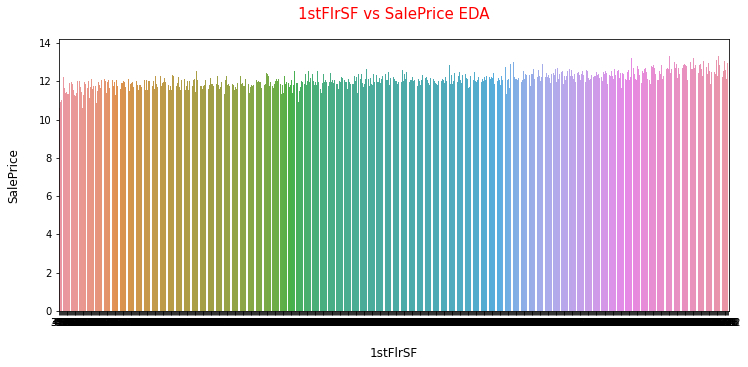

In [32]:
# Lets understad the trend between 1stFlrSF and SalePrice
plt.figure(figsize=[12,5])
sns.barplot(x = housing["1stFlrSF"], y = housing["SalePrice"], ci=None)
plt.title("1stFlrSF vs SalePrice EDA", size = 15, color = "Red", pad = 20)
#plt.xticks(rotation='vertical')
plt.xlabel("\n1stFlrSF", size = 12, color = "black")
plt.ylabel("SalePrice\n", size = 12, color = "black")
plt.show()

#### Positive trend observed. But significant rise is not observed. ####

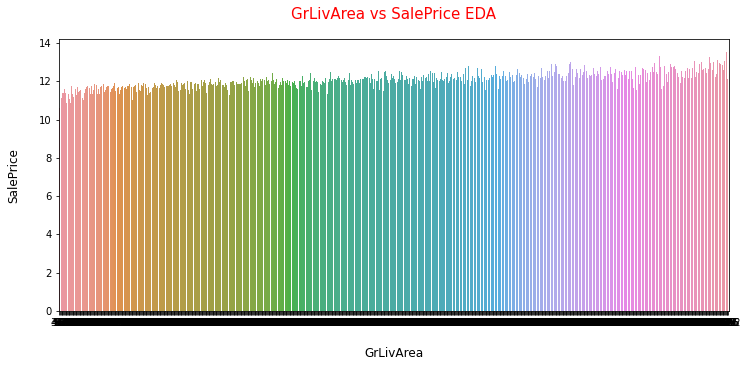

In [33]:
# Lets understad the trend between GrLivArea and SalePrice
plt.figure(figsize=[12,5])
sns.barplot(x = housing["GrLivArea"], y = housing["SalePrice"], ci=None)
plt.title("GrLivArea vs SalePrice EDA", size = 15, color = "Red", pad = 20)
#plt.xticks(rotation='vertical')
plt.xlabel("\nGrLivArea", size = 12, color = "black")
plt.ylabel("SalePrice\n", size = 12, color = "black")
plt.show()

#### Positive trend observed. As GrLivArea increases, SalePrice increases. ####

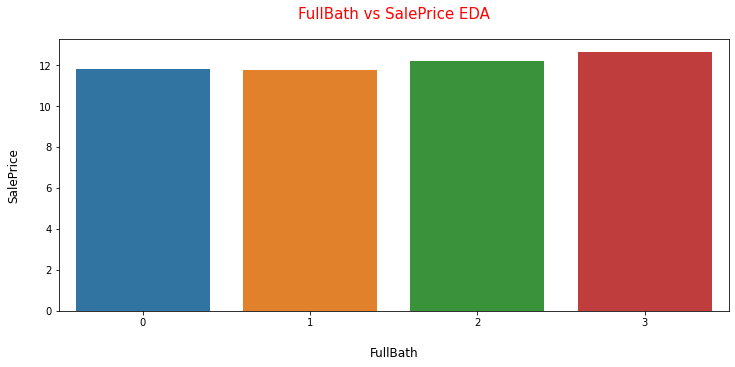

In [34]:
# Lets understad the trend between FullBath and SalePrice
plt.figure(figsize=[12,5])
sns.barplot(x = housing["FullBath"], y = housing["SalePrice"], ci=None)
plt.title("FullBath vs SalePrice EDA", size = 15, color = "Red", pad = 20)
#plt.xticks(rotation='vertical')
plt.xlabel("\nFullBath", size = 12, color = "black")
plt.ylabel("SalePrice\n", size = 12, color = "black")
plt.show()

#### Positive trend observed. As FullBath increases, SalePrice increases. ####

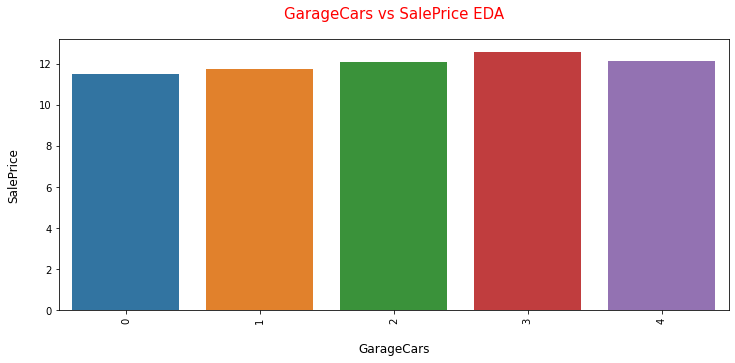

In [35]:
# GarageCars vs SalePrice barplot , understand the trend
plt.figure(figsize=[12,5])
sns.barplot(x = housing["GarageCars"], y = housing["SalePrice"], ci=None)
plt.title("GarageCars vs SalePrice EDA", size = 15, color = "Red", pad = 20)
plt.xticks(rotation='vertical')
plt.xlabel("\nGarageCars", size = 12, color = "black")
plt.ylabel("SalePrice\n", size = 12, color = "black")
plt.show()

####  SalePrice is max when GarageCars = 3 and comes down at 4. ####

In [36]:
# Lets check for any negative trends. Use Correlation to understand negative correlation
heat_map = extract_num_feature.corr()
heat_map_corr = heat_map[heat_map['SalePrice'] < -0.1]['SalePrice']
print (heat_map_corr)

KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
PropertyAge     -0.587290
Name: SalePrice, dtype: float64


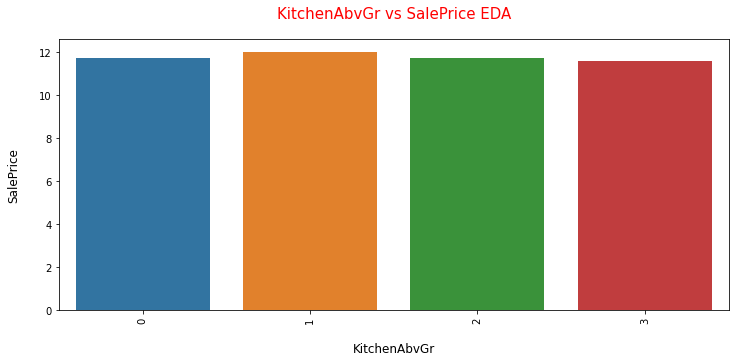

In [37]:
plt.figure(figsize=[12,5])
sns.barplot(x = housing["KitchenAbvGr"], y = housing["SalePrice"], ci=None)
plt.title("KitchenAbvGr vs SalePrice EDA", size = 15, color = "Red", pad = 20)
plt.xticks(rotation='vertical')
plt.xlabel("\nKitchenAbvGr", size = 12, color = "black")
plt.ylabel("SalePrice\n", size = 12, color = "black")
plt.show()

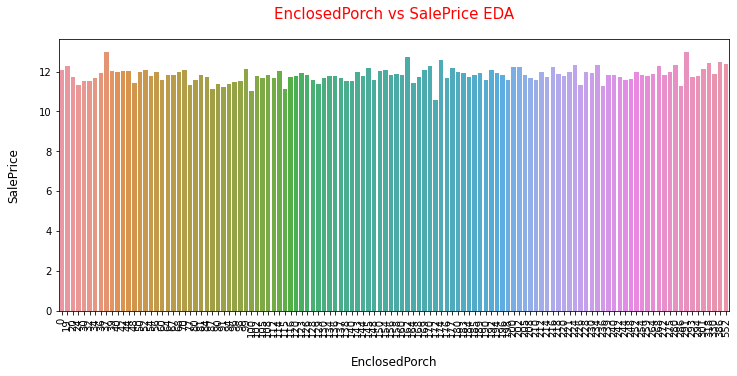

In [38]:
plt.figure(figsize=[12,5])
sns.barplot(x = housing["EnclosedPorch"], y = housing["SalePrice"], ci=None)
plt.title("EnclosedPorch vs SalePrice EDA", size = 15, color = "Red", pad = 20)
plt.xticks(rotation='vertical')
plt.xlabel("\nEnclosedPorch", size = 12, color = "black")
plt.ylabel("SalePrice\n", size = 12, color = "black")
plt.show()

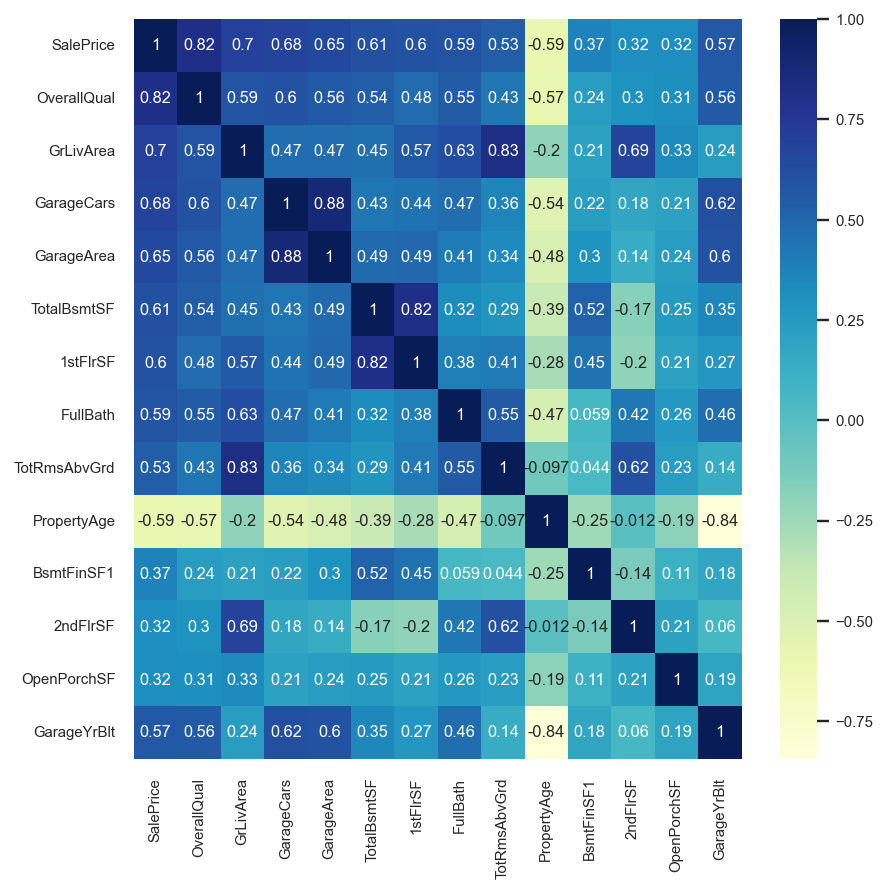

In [39]:
# Use the heat map to get the correlation on major numerical feature
heat_map_finer = extract_num_feature[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'PropertyAge',
        'BsmtFinSF1', '2ndFlrSF', 'OpenPorchSF', 'GarageYrBlt']].corr()
sns.set(font_scale=0.7)
plt.figure(figsize=(7, 7), dpi=140)
sns.heatmap(heat_map_finer, cmap = 'YlGnBu', annot = True)
plt.show()

In [40]:
# Lets get the features with correlation > 0.75 , we can drop the feature if the correlation value is 0.75 and above
# this will avoid multi-colinearity
extract_num_feature[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'PropertyAge',
       'BsmtFinSF1', '2ndFlrSF', 'OpenPorchSF', 'GarageYrBlt']].corr() >= 0.75

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,PropertyAge,BsmtFinSF1,2ndFlrSF,OpenPorchSF,GarageYrBlt
SalePrice,True,True,False,False,False,False,False,False,False,False,False,False,False,False
OverallQual,True,True,False,False,False,False,False,False,False,False,False,False,False,False
GrLivArea,False,False,True,False,False,False,False,False,True,False,False,False,False,False
GarageCars,False,False,False,True,True,False,False,False,False,False,False,False,False,False
GarageArea,False,False,False,True,True,False,False,False,False,False,False,False,False,False
TotalBsmtSF,False,False,False,False,False,True,True,False,False,False,False,False,False,False
1stFlrSF,False,False,False,False,False,True,True,False,False,False,False,False,False,False
FullBath,False,False,False,False,False,False,False,True,False,False,False,False,False,False
TotRmsAbvGrd,False,False,True,False,False,False,False,False,True,False,False,False,False,False
PropertyAge,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [41]:
extract_num_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  BsmtHalfBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   int64  
 18  BedroomA

In [42]:
# Drop the feature with higher correlation
extract_num_feature.drop(columns = ["TotRmsAbvGrd", "GarageArea", "1stFlrSF", "GarageYrBlt" ], axis = 1, inplace = True)

In [43]:
extract_num_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  BsmtFullBath   1460 non-null   int64  
 14  BsmtHalfBath   1460 non-null   int64  
 15  FullBath       1460 non-null   int64  
 16  HalfBath       1460 non-null   int64  
 17  BedroomAbvGr   1460 non-null   int64  
 18  KitchenA

#### Work on categorical features ####

In [44]:
categorical_features = housing.select_dtypes(include = ["object"]).columns
extract_cat_data = housing[categorical_features]
extract_cat_data.shape

(1460, 43)

In [45]:
extract_cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1460 non-null   object
 18  ExterQual      1460 non-null

In [46]:
# Generate dummy values for all the categorical features 
extract_cat_data_dummies = pd.get_dummies(extract_cat_data, drop_first=True)
extract_cat_data_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
# Concat the numerical and categorical features
train = pd.concat([extract_cat_data_dummies,extract_num_feature],axis=1)

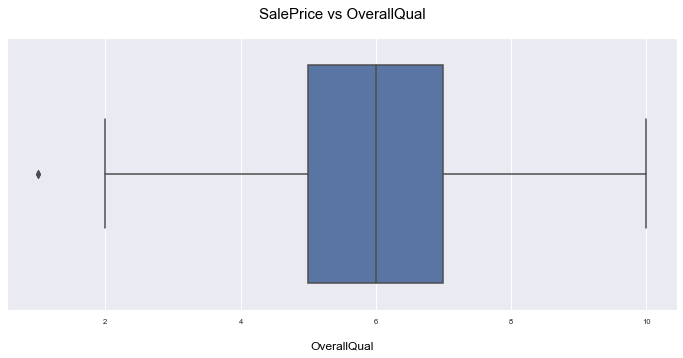

In [48]:
# Identify the outliers. We need to remove the outliers to get more accurate results.
# Lets start with atemp
plt.figure(figsize=[12,5])
sns.boxplot(x = train["OverallQual"])
plt.title("SalePrice vs OverallQual", size = 15, color = "black", pad = 20)
plt.xlabel("\nOverallQual", size = 12, color = "black")
plt.show()

In [49]:
mean = np.mean(train["OverallQual"])
sigma = np.std(train["OverallQual"])
print("Mean: {:.2f}".format(mean))
print("Standard Deviation: {:.2f}".format(sigma))

Mean: 6.10
Standard Deviation: 1.38


In [50]:
lower_range = mean-(3*sigma)
upper_range = mean+(3*sigma)
print("Good data range {:.2f} and {:.2f}".format(lower_range, upper_range))

Good data range 1.95 and 10.25


In [51]:
# Remove outlair rows
train = train[train["OverallQual"] >= 1.95]

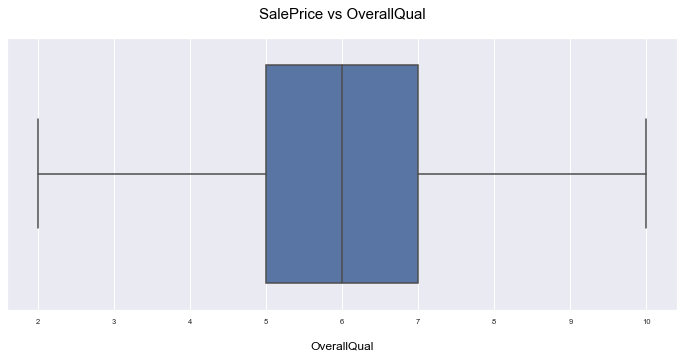

In [52]:
plt.figure(figsize=[12,5])
sns.boxplot(x = train["OverallQual"])
plt.title("SalePrice vs OverallQual", size = 15, color = "black", pad = 20)
plt.xlabel("\nOverallQual", size = 12, color = "black")
plt.show()

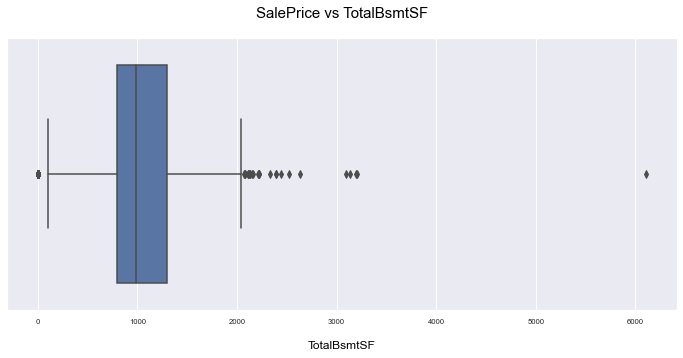

In [53]:
plt.figure(figsize=[12,5])
sns.boxplot(x = train["TotalBsmtSF"])
plt.title("SalePrice vs TotalBsmtSF", size = 15, color = "black", pad = 20)
plt.xlabel("\nTotalBsmtSF", size = 12, color = "black")
plt.show()

In [54]:
mean = np.mean(train["TotalBsmtSF"])
sigma = np.std(train["TotalBsmtSF"])
print("Mean: {:.2f}".format(mean))
print("Standard Deviation: {:.2f}".format(sigma))

Mean: 1058.41
Standard Deviation: 437.87


In [55]:
lower_range = mean-(3*sigma)
upper_range = mean+(3*sigma)
print("Good data range {:.2f} and {:.2f}".format(lower_range, upper_range))

Good data range -255.20 and 2372.02


In [56]:
# Remove outlair rows
train = train[train["TotalBsmtSF"] <= 2372.02]
train = train[extract_num_feature["TotalBsmtSF"] > 0]

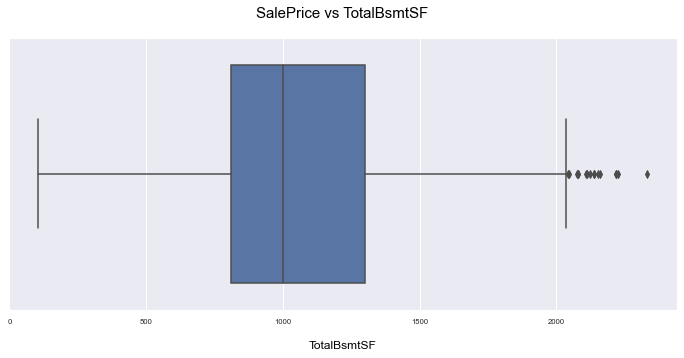

In [57]:
plt.figure(figsize=[12,5])
sns.boxplot(x = train["TotalBsmtSF"])
plt.title("SalePrice vs TotalBsmtSF", size = 15, color = "black", pad = 20)
plt.xlabel("\nTotalBsmtSF", size = 12, color = "black")
plt.show()

In [58]:
extractNull1 = pd.DataFrame(train.dtypes, columns=['Dtype'])
extractNull1['Null'] = train.isnull().any()
extractNull1['NullCount'] = train.isnull().sum().values
extractNull1['Unique'] = train.nunique().values
extractNull1

,Dtype,Null,NullCount,Unique
MSZoning_FV,uint8,False,0,2
MSZoning_RH,uint8,False,0,2
MSZoning_RL,uint8,False,0,2
MSZoning_RM,uint8,False,0,2
Street_Pave,uint8,False,0,2
Alley_NA,uint8,False,0,2
Alley_Pave,uint8,False,0,2
LotShape_IR2,uint8,False,0,2
LotShape_IR3,uint8,False,0,2
LotShape_Reg,uint8,False,0,2


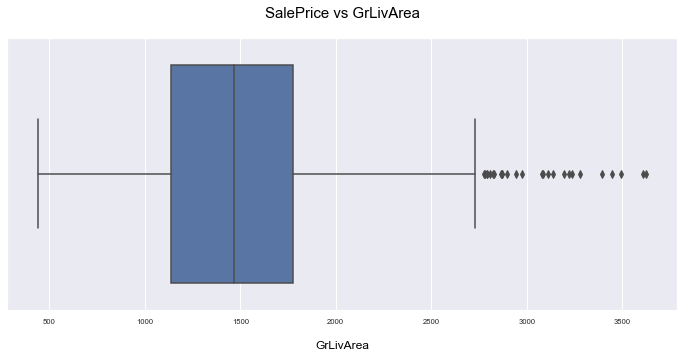

In [59]:
plt.figure(figsize=[12,5])
sns.boxplot(x = train["GrLivArea"])
plt.title("SalePrice vs GrLivArea", size = 15, color = "black", pad = 20)
plt.xlabel("\nGrLivArea", size = 12, color = "black")
plt.show()

In [60]:
mean = np.mean(train["GrLivArea"])
sigma = np.std(train["GrLivArea"])
print("Mean: {:.2f}".format(mean))
print("Standard Deviation: {:.2f}".format(sigma))

Mean: 1508.53
Standard Deviation: 492.81


In [61]:
lower_range = mean-(3*sigma)
upper_range = mean+(3*sigma)
print("Good data range {:.2f} and {:.2f}".format(lower_range, upper_range))

Good data range 30.11 and 2986.96


In [62]:
# Remove outlair rows
train = train[train["GrLivArea"] <= 2986.96]

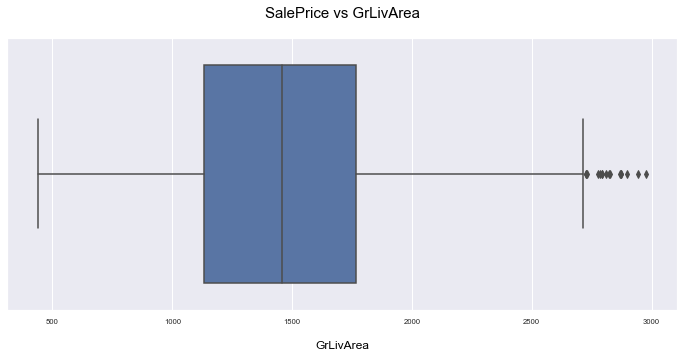

In [63]:
plt.figure(figsize=[12,5])
sns.boxplot(x = train["GrLivArea"])
plt.title("SalePrice vs GrLivArea", size = 15, color = "black", pad = 20)
plt.xlabel("\nGrLivArea", size = 12, color = "black")
plt.show()

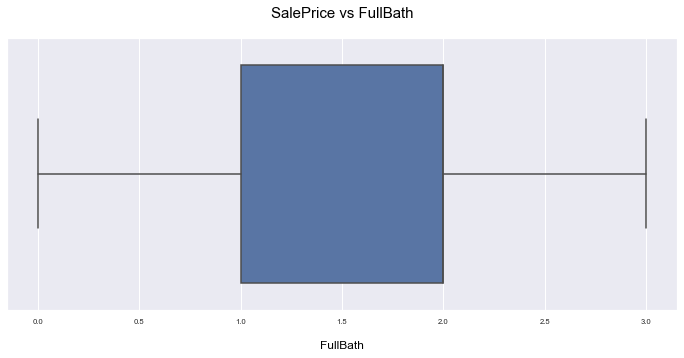

In [64]:
plt.figure(figsize=[12,5])
sns.boxplot(x = train["FullBath"])
plt.title("SalePrice vs FullBath", size = 15, color = "black", pad = 20)
plt.xlabel("\nFullBath", size = 12, color = "black")
plt.show()

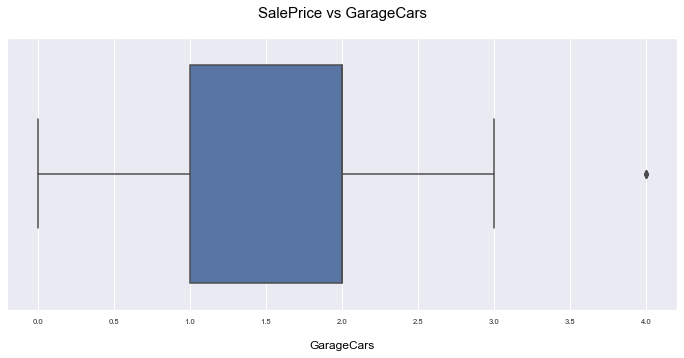

In [65]:
plt.figure(figsize=[12,5])
sns.boxplot(x = train["GarageCars"])
plt.title("SalePrice vs GarageCars", size = 15, color = "black", pad = 20)
plt.xlabel("\nGarageCars", size = 12, color = "black")
plt.show()

In [66]:
# Remove outlair rows
train = train[train["GarageCars"] <= 3]

### Lets use various regression technique to identify the best algorithm to predict the independent variable ###

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
extractNull2 = pd.DataFrame(train.dtypes, columns=['Dtype'])
extractNull2['Null'] = train.isnull().any()
extractNull2['NullCount'] = train.isnull().sum().values
extractNull2['Unique'] = train.nunique().values
extractNull2

,Dtype,Null,NullCount,Unique
MSZoning_FV,uint8,False,0,2
MSZoning_RH,uint8,False,0,2
MSZoning_RL,uint8,False,0,2
MSZoning_RM,uint8,False,0,2
Street_Pave,uint8,False,0,2
Alley_NA,uint8,False,0,2
Alley_Pave,uint8,False,0,2
LotShape_IR2,uint8,False,0,2
LotShape_IR3,uint8,False,0,2
LotShape_Reg,uint8,False,0,2


In [69]:
y = train.pop('SalePrice')
X = train

In [70]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Alley_NA', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg',
       ...
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'PropertyAge'],
      dtype='object', length=253)

In [71]:
# Split the data set to train and test split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,
                                                    test_size = 0.3, random_state=100)


#### Linear Regression Technique for prediction ####

In [72]:
lm = LinearRegression() 
lm.fit(X_train,y_train)

LinearRegression()

In [73]:
# Intercept and coefficient values generated from Linear Regression technique
print(lm.intercept_)
print(lm.coef_)

-651934490.9270103
[ 1.19080139e-01  5.22465601e-02  2.11607720e-01  1.64599202e-01
  2.12341226e-03 -5.25143036e-04  2.78905199e-03  1.66151209e-03
  1.20825576e-03  5.08489138e-03 -5.42997485e-04 -1.14936237e-03
 -1.72190630e-03 -2.03188306e+08  6.73082164e-03 -7.96563126e-03
 -6.80566030e-03 -1.17660673e-02  4.44937283e-03 -1.46382636e-02
  3.97103045e-04  2.44089027e-03  9.20763952e-03  5.98542745e-03
  1.18238652e-02  2.81695354e-02 -5.79430495e-03  4.81335018e-03
  6.05627372e-03 -9.86104131e-03 -3.37590557e-03  3.39373626e-03
 -1.86885513e-03 -3.88490507e-03  1.09360971e-02  2.46427542e-02
  2.54994963e-03  5.08043497e-03  5.00208246e-03  4.66673029e-03
  1.15350628e-02  2.31181841e-02  7.01760489e-03  2.80866413e-03
  1.60492935e-02  3.64078172e-02  7.36344514e-03  1.53077496e-02
  5.12247343e-04  1.09699827e-02  1.65287408e-03  7.66314807e-03
  4.64738093e-03  3.47372280e-03  1.94542958e+09 -2.82863751e-03
 -8.64559988e-04 -4.15452937e-03  1.24978603e-03 -8.27160764e-03
 -9.16

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

In [75]:

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R sqr for training data " + str(r2_train_lr))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R sqr for test data " + str(r2_test_lr))
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual Analysis for training data " + str(rss1_lr))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual Analysis for Test data " + str(rss2_lr))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean sqr error for training data " + str(mse_train_lr))
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean sqr error for training data " + str(mse_test_lr))
metric.append(mse_test_lr**0.5)

R sqr for training data 0.9436839464696509
R sqr for test data -3.436601018455489e+21
Residual Analysis for training data 7.8532050837149034
Residual Analysis for Test data 2.1266981623247387e+23
Mean sqr error for training data 0.00805456931663067
Mean sqr error for training data 5.0756519387225267e+20


#### Ridge regression technique ####

In [76]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# Best alpha value to be used on Ridge regression algorithm
print(model_cv.best_params_)

{'alpha': 100}


In [78]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.05851661e-02  3.38779468e-03  1.60771514e-02  8.90695765e-04
  7.87774502e-03 -1.72073916e-03  4.94379453e-03  2.97487477e-03
 -1.14279444e-05 -1.40697137e-04  7.57555012e-04 -8.59332593e-04
 -3.25593781e-03 -3.42176221e-32  9.99707309e-03 -6.58055730e-03
 -2.79745428e-03 -7.22357426e-03  2.37752547e-03 -7.49060265e-03
 -1.65161210e-03 -2.83689680e-03  2.23095351e-03  2.56477233e-03
  2.66319633e-03  1.63322202e-02 -1.03976283e-02 -6.24621476e-03
 -1.19456776e-02 -1.56347026e-02 -6.08979868e-03 -2.99415314e-03
 -1.25512455e-03 -4.54199634e-03  7.30326495e-03  2.03844280e-02
 -1.14251238e-02  1.98786348e-04 -2.07776930e-03  3.85102436e-05
  8.53690340e-03  1.69408775e-02  2.45917486e-03  1.85043547e-03
  1.87284249e-03  1.34523535e-02  4.36677441e-03  7.08689372e-03
 -3.76134749e-03  3.88025392e-03 -1.00938935e-03  4.96477528e-03
  3.05108068e-03  6.18876887e-03  6.66820825e-03 -9.64351485e-04
 -5.17403053e-03 -1.73206185e-03  7.73044204e-04  1.17475145e-03
  1.32347798e-03 -1.04458

In [79]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R sqr for training data " + str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R sqr for test data " + str(r2_test_lr))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual Analysis for training data " + str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual Analysis for Test data " + str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean sqr error for training data " + str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean sqr error for test data " + str(mse_test_lr))
metric2.append(mse_test_lr**0.5)

R sqr for training data 0.927781115640689
R sqr for test data 0.9181899424556778
Residual Analysis for training data 10.070835476515045
Residual Analysis for Test data 5.062714528245859
Mean sqr error for training data 0.010329062027194918
Mean sqr error for test data 0.012082850902734747


In [80]:
# Lets get the dependent variable which affects the independent feature and sort them based on the coefficient.
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,12.026
237,GrLivArea,0.062
228,OverallQual,0.048
234,TotalBsmtSF,0.043
229,OverallCond,0.032
231,BsmtFinSF1,0.026
245,GarageCars,0.025
223,SaleCondition_Normal,0.023
36,Neighborhood_NridgHt,0.020
235,2ndFlrSF,0.018


#### Lasso Regression Technique ####

In [81]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [83]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [84]:
lasso.coef_

array([ 1.54802468e-02,  2.29870440e-03,  1.79652217e-02,  0.00000000e+00,
        8.44226761e-03, -0.00000000e+00,  3.48323588e-03,  1.57841270e-03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  8.87271794e-03, -5.07805871e-04,
       -1.07142482e-03, -4.10931953e-03,  1.34772059e-03, -2.56621617e-03,
       -0.00000000e+00, -0.00000000e+00,  2.35975848e-03,  1.81061594e-03,
        2.68223449e-04,  1.71568127e-02, -7.81751289e-03, -0.00000000e+00,
       -9.45425015e-03, -1.00420285e-02, -6.12865736e-03, -0.00000000e+00,
        0.00000000e+00, -1.98644511e-03,  8.18366431e-04,  1.69749803e-02,
       -7.77238116e-03,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        4.24386645e-03,  1.43088201e-02,  3.28557485e-04,  0.00000000e+00,
        0.00000000e+00,  1.31197544e-02,  0.00000000e+00,  4.56183205e-03,
       -3.84120134e-03,  9.78050275e-04, -0.00000000e+00,  4.84403669e-03,
        0.00000000e+00,  

In [85]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R sqr for training data " + str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R sqr for test data " + str(r2_test_lr))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual Analysis for training data " + str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual Analysis for Test data " + str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean sqr error for training data " + str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean sqr error for Test data " + str(mse_test_lr))
metric3.append(mse_test_lr**0.5)

R sqr for training data 0.9295551050383184
R sqr for test data 0.9288012456837051
Residual Analysis for training data 9.823454815361082
Residual Analysis for Test data 4.406047113153878
Mean sqr error for training data 0.010075338272165212
Mean sqr error for Test data 0.010515625568386344


In [86]:
# Lets get the dependent variable which affects the independent feature and sort them based on the coefficient.
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.025),
 ('MSZoning_FV', 0.015),
 ('MSZoning_RH', 0.002),
 ('MSZoning_RL', 0.018),
 ('MSZoning_RM', 0.0),
 ('Street_Pave', 0.008),
 ('Alley_NA', -0.0),
 ('Alley_Pave', 0.003),
 ('LotShape_IR2', 0.002),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('Utilities_NoSeWa', -0.0),
 ('LotConfig_CulDSac', 0.009),
 ('LotConfig_FR2', -0.001),
 ('LotConfig_FR3', -0.001),
 ('LotConfig_Inside', -0.004),
 ('LandSlope_Mod', 0.001),
 ('LandSlope_Sev', -0.003),
 ('Neighborhood_Blueste', -0.0),
 ('Neighborhood_BrDale', -0.0),
 ('Neighborhood_BrkSide', 0.002),
 ('Neighborhood_ClearCr', 0.002),
 ('Neighborhood_CollgCr', 0.0),
 ('Neighborhood_Crawfor', 0.017),
 ('Neighborhood_Edwards', -0.008),
 ('Neighborhood_Gilbert', -0.0),
 ('Neighborhood_IDOTRR', -0.009),
 ('Neighborhood_MeadowV', -0.01),
 ('Neighborhood_Mitchel', -0.006),
 ('Neighborhood_NAmes', -0.0),
 ('Neighborhood_NPkVill', 0.0),
 ('Neighborhood_N

In [87]:
mod = list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,12.025
237,GrLivArea,0.130
228,OverallQual,0.066
229,OverallCond,0.044
234,TotalBsmtSF,0.042
217,SaleType_New,0.034
223,SaleCondition_Normal,0.029
245,GarageCars,0.029
231,BsmtFinSF1,0.024
3,MSZoning_RL,0.018


In [88]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.436839e-01,0.927781,0.929555
1,R2 Score (Test),-3.436601e+21,0.918190,0.928801
2,RSS (Train),7.853205e+00,10.070835,9.823455
3,RSS (Test),2.126698e+23,5.062715,4.406047
4,MSE (Train),8.974725e-02,0.101632,0.100376
5,MSE (Test),2.252921e+10,0.109922,0.102546


# Conclusion #
### I will use Lasso regression technique for predicting as the primary difference between Lasso and Ridge regression is their penalty term. The penalty term here is the sum of the absolute values of all the coefficients present in the model. With Lasso, the penalty pushes some of the coefficient estimates to be exactly 0, provided the tuning parameter, λ, is large enough. Lasso performs feature selection. This variable selection results in models that are easier to interpret.
